In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Two types of data(int64,object) data types.

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

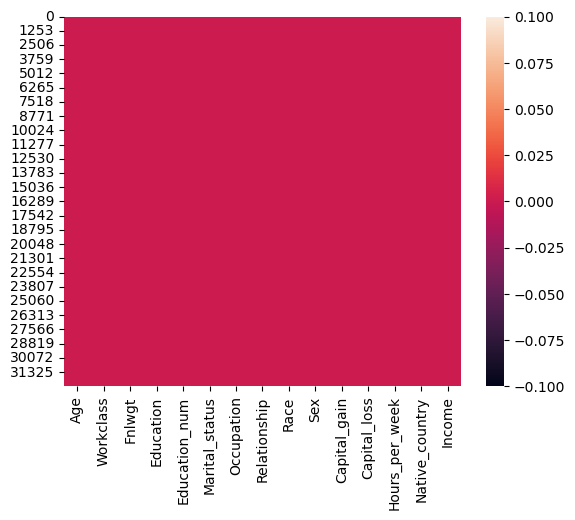

In [9]:
sns.heatmap(df.isnull())

We can clearly visualize that yhere is no null values.

In [10]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [11]:
for i in df.columns:
    print(df[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 32560, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>


<bound method IndexOpsMixin.value_counts of 0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 32560, dtype: int64>


<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors

In [12]:
df.duplicated().sum()

24

In [13]:
df.drop(df.duplicated().sum())

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df.shape

(32560, 15)

In [15]:
df = df[~df.duplicated()]


In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(32536, 15)

In [18]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1.This gives the statistical summary of numerical columns. 
The summary of the dataset looks perfect since there is no negative or invalid values are present.
2.In this dataset count of all columns are same,which means there is no missing values are present. 
3.The median(50%) is less than mean which means skewness is preset
4.By summarizing the data there is diff between 75% and max Which means not muchoutliers are present.

In [19]:
df.Sex.value_counts()

Sex
 Male      21774
 Female    10762
Name: count, dtype: int64

In [20]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [21]:
df.Workclass.value_counts()

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [22]:
df.Occupation.value_counts()

Occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [23]:
# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Income'] == ' <=50K'].shape[0]
print("Individuals making more than $50k: {}".format(n_greater_50k))



Individuals making more than $50k: 24697


In [24]:
# Number of records where individual's income is at most $50,000
n_at_most_50k = df[df['Income'] == ' >50K'].shape[0]
print("Individuals making at most $50k: {}".format(n_at_most_50k))


Individuals making at most $50k: 7839


In [25]:
# changing "?" to Unknown
df.replace("?", np.NaN, inplace=True)

In [26]:
# after changing "?"
df.Workclass.value_counts()


Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

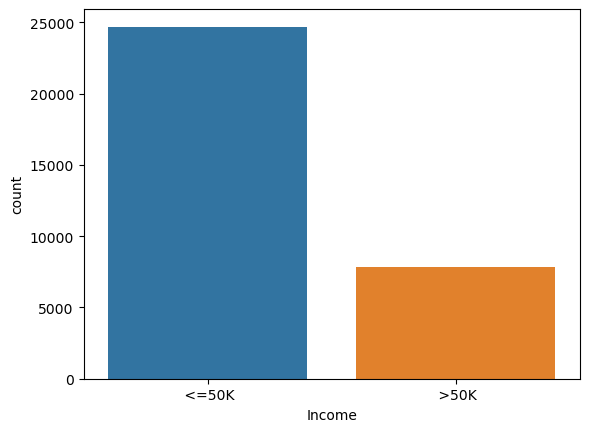

In [27]:
ax=sns.countplot(x='Income',data=df)

<Axes: xlabel='Income', ylabel='Hours_per_week'>

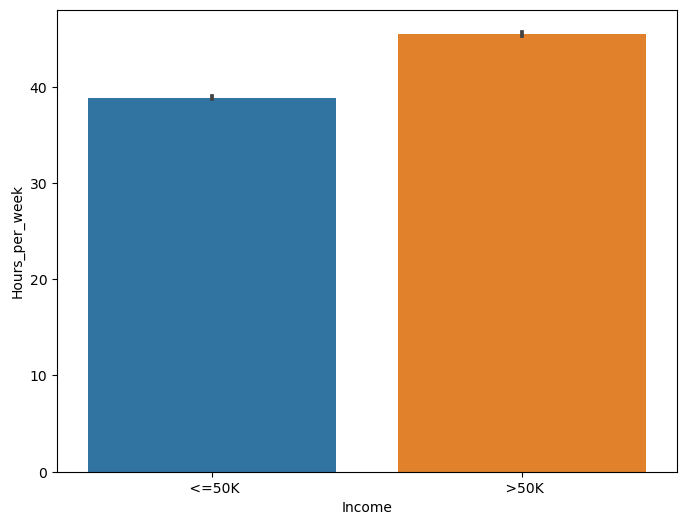

In [28]:
plt.figure(figsize=[8,6])
sns.barplot(data=df, x='Income', y='Hours_per_week')

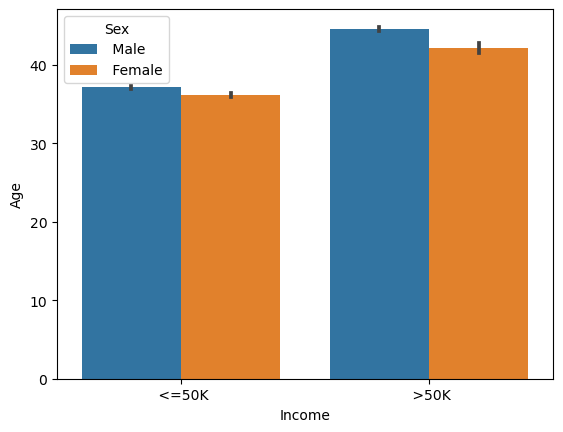

In [29]:
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')


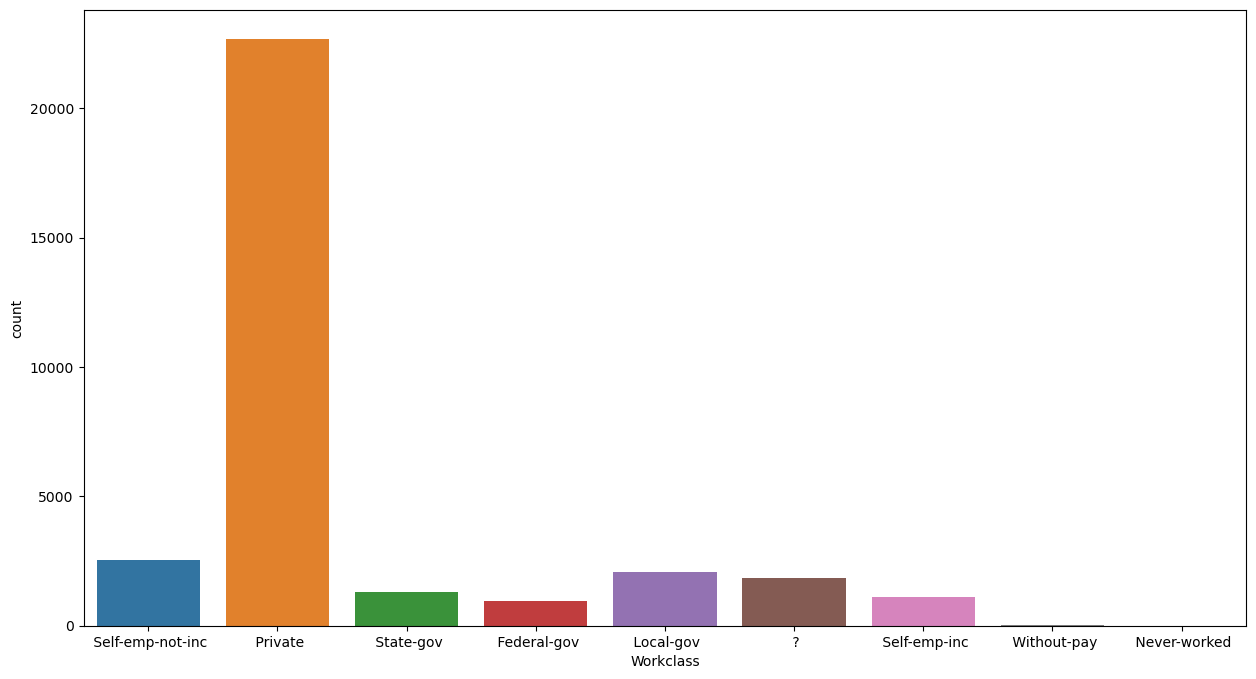

In [30]:
plt.figure(figsize=[15,8])
ax=sns.countplot(x='Workclass',data=df)

Text(0.5, 1.0, 'Countplot for Maritial Status')

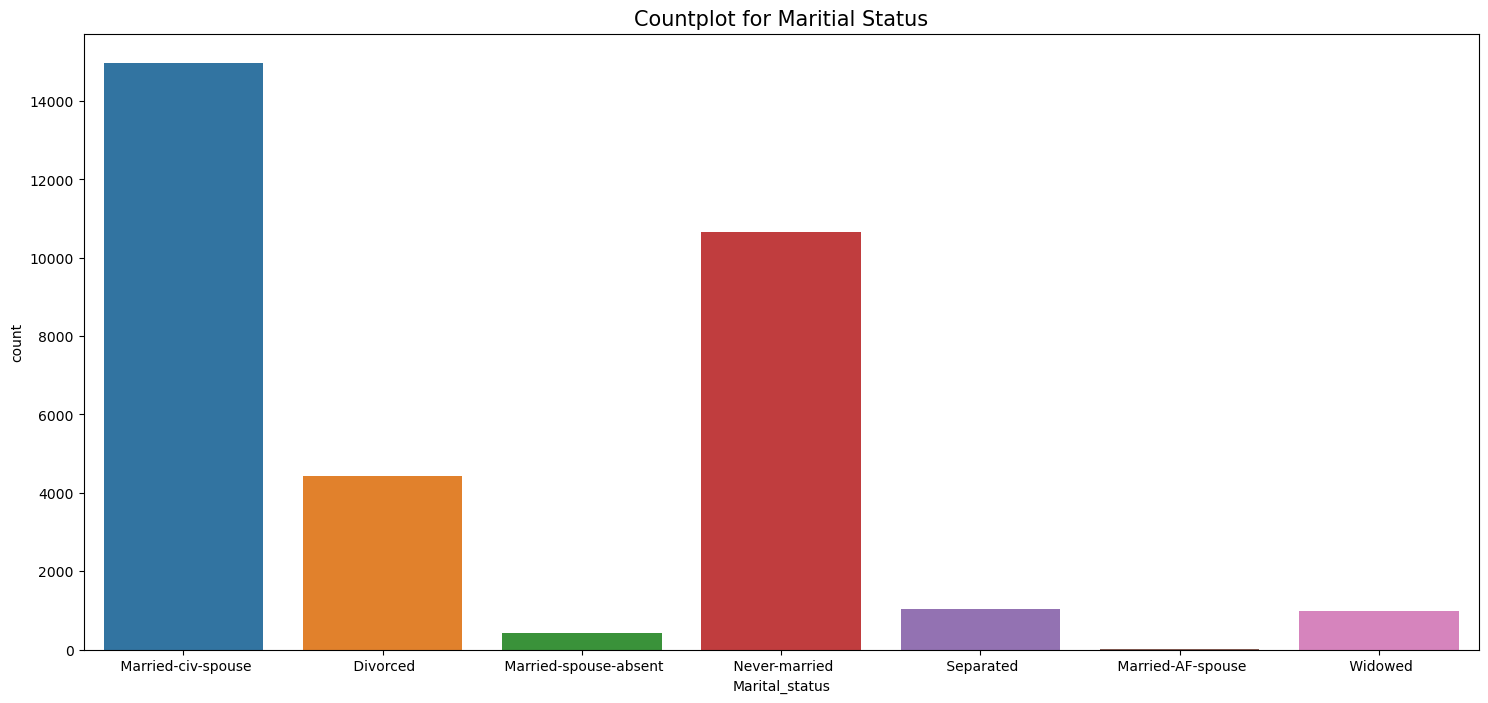

In [31]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
sns.countplot(x='Marital_status',data=df)
plt.title("Countplot for Maritial Status", fontsize = 15)

<Axes: xlabel='Marital_status', ylabel='count'>

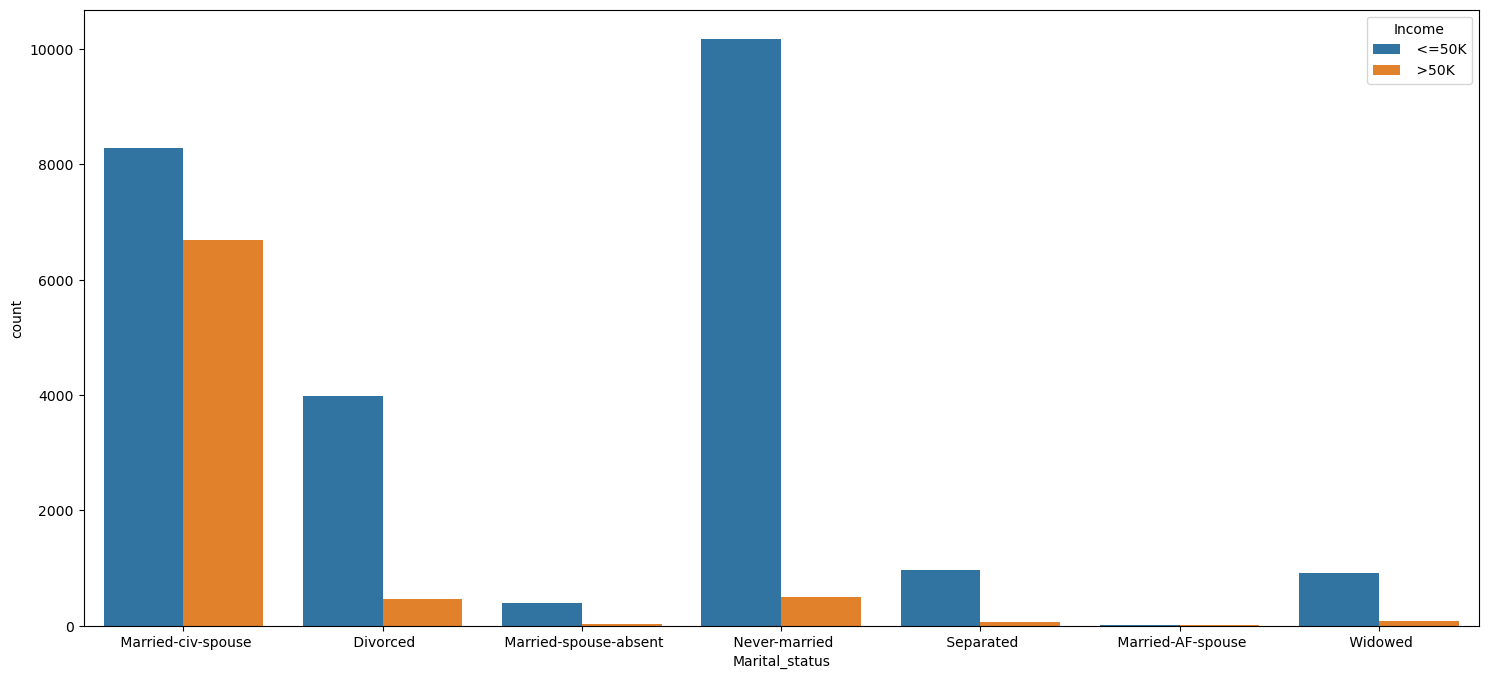

In [32]:
plt.figure(figsize=[18,8])
sns.countplot(x='Marital_status',hue='Income',data=df)

In [33]:
df['Marital_status'].value_counts()

Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

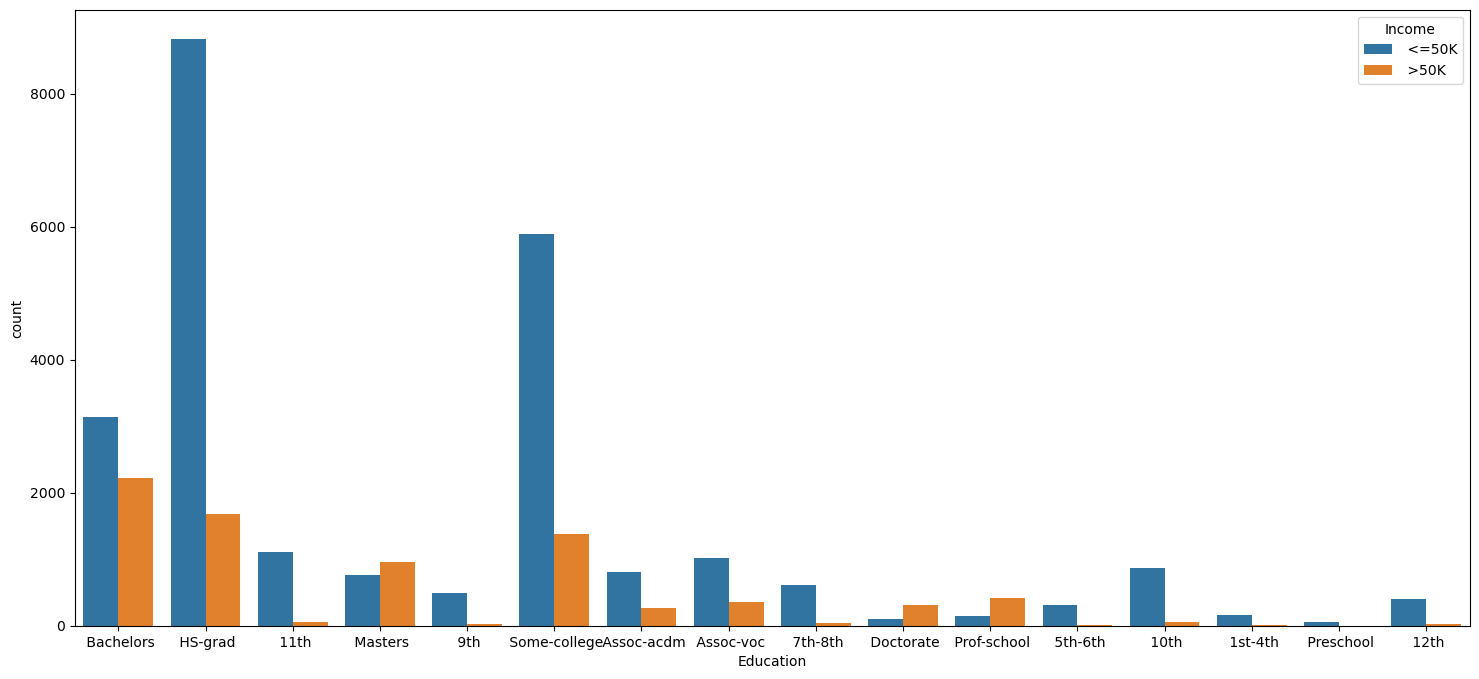

In [34]:
# Creating a countplot for 'Education'
plt.figure(figsize=[18,8])
sns.countplot(x='Education',hue='Income',data=df)

<Axes: xlabel='Education_num', ylabel='count'>

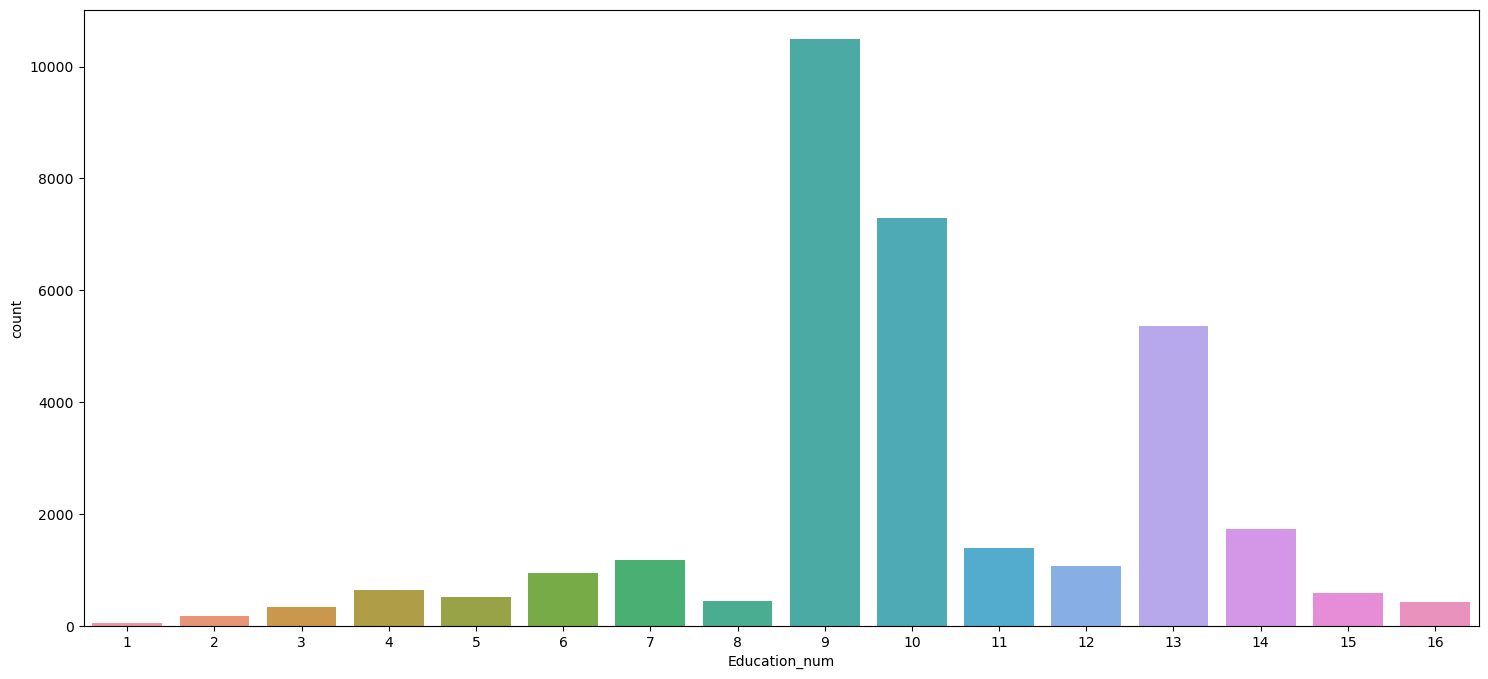

In [35]:

plt.figure(figsize=[18,8])
sns.countplot(x='Education_num',data=df)

In [36]:
#checking for categorical columns
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print('Categorical columns:',cat_cols)

Categorical columns: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [37]:
#checking for NUMERICAL columns
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print('Numerical columns:',num_cols)

Numerical columns: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [38]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


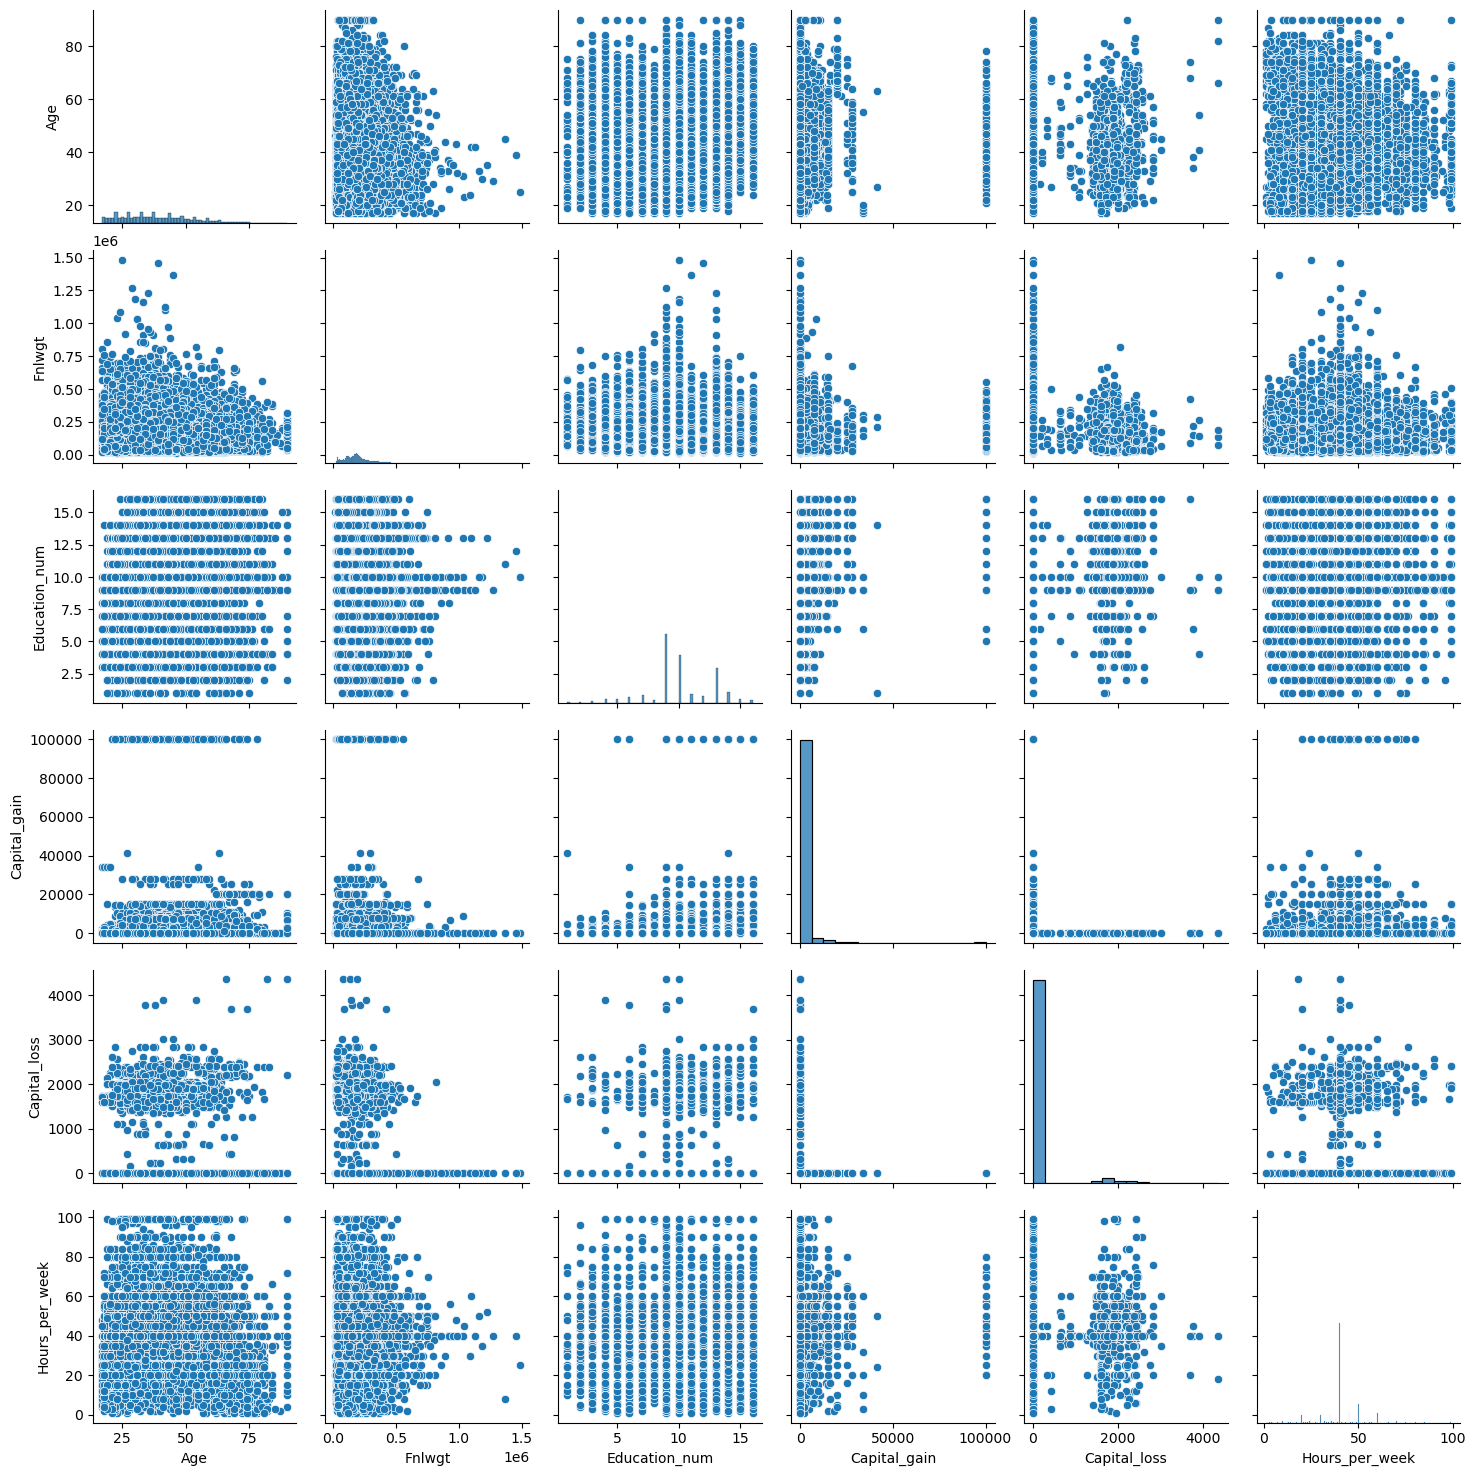

In [39]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

# Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
for col in df.columns:
    if df[col].dtypes == 'object':
        le= LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


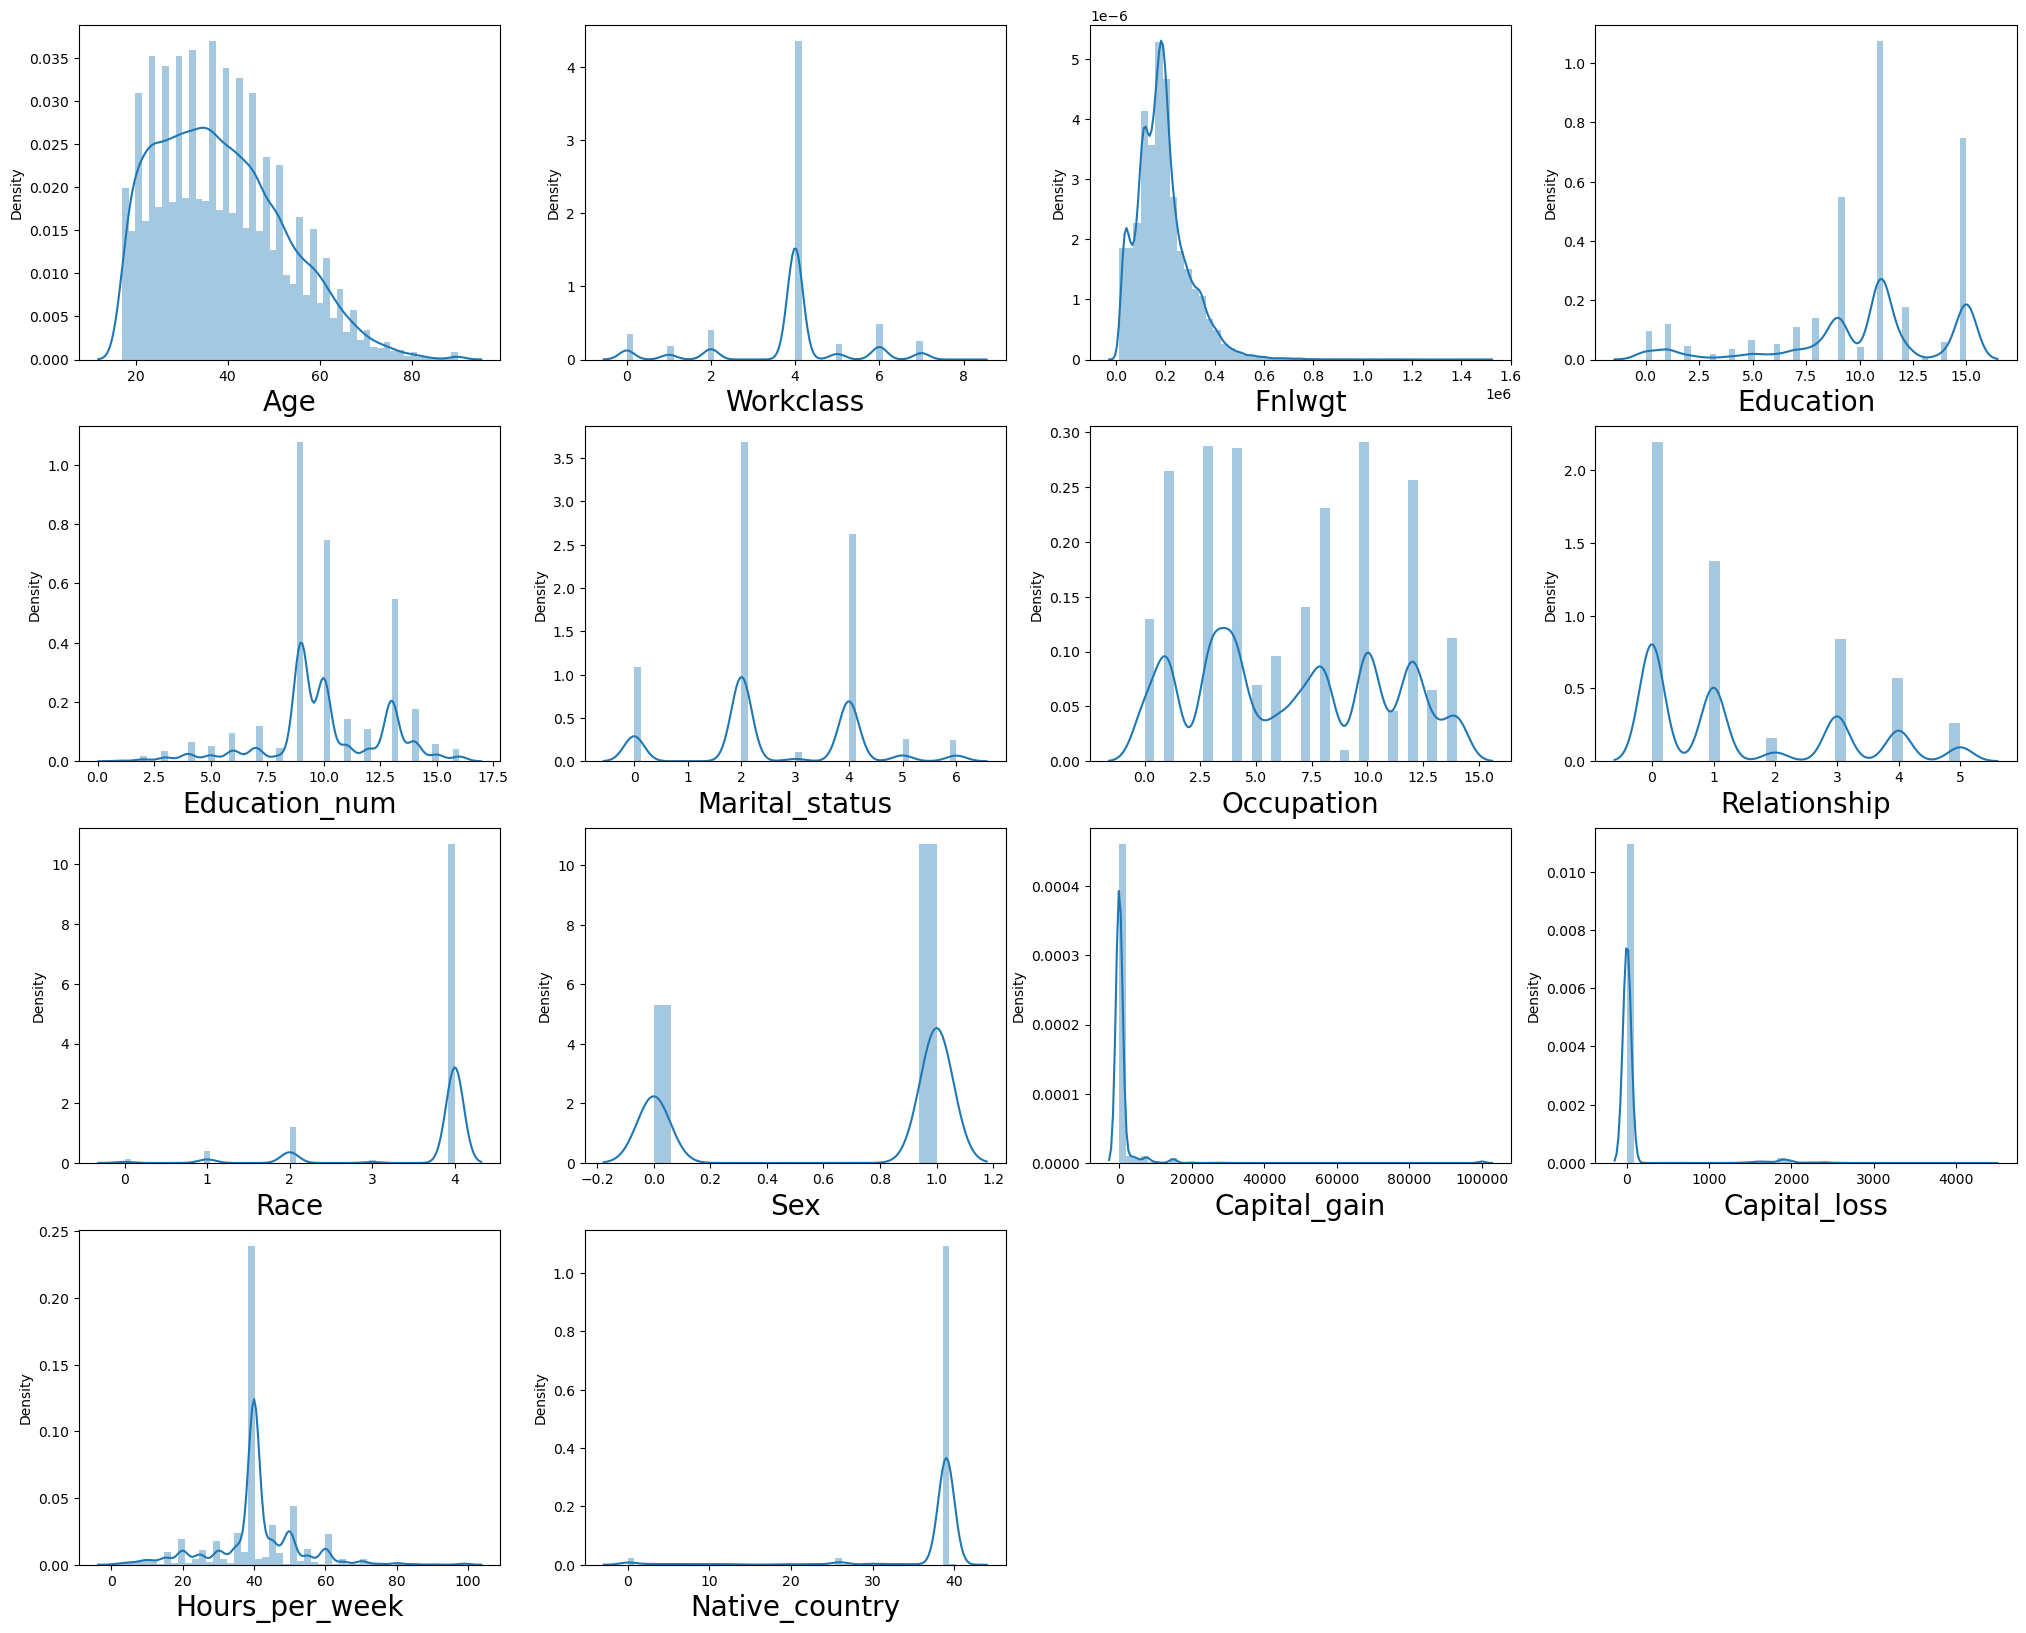

In [43]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

# Checking for outliers

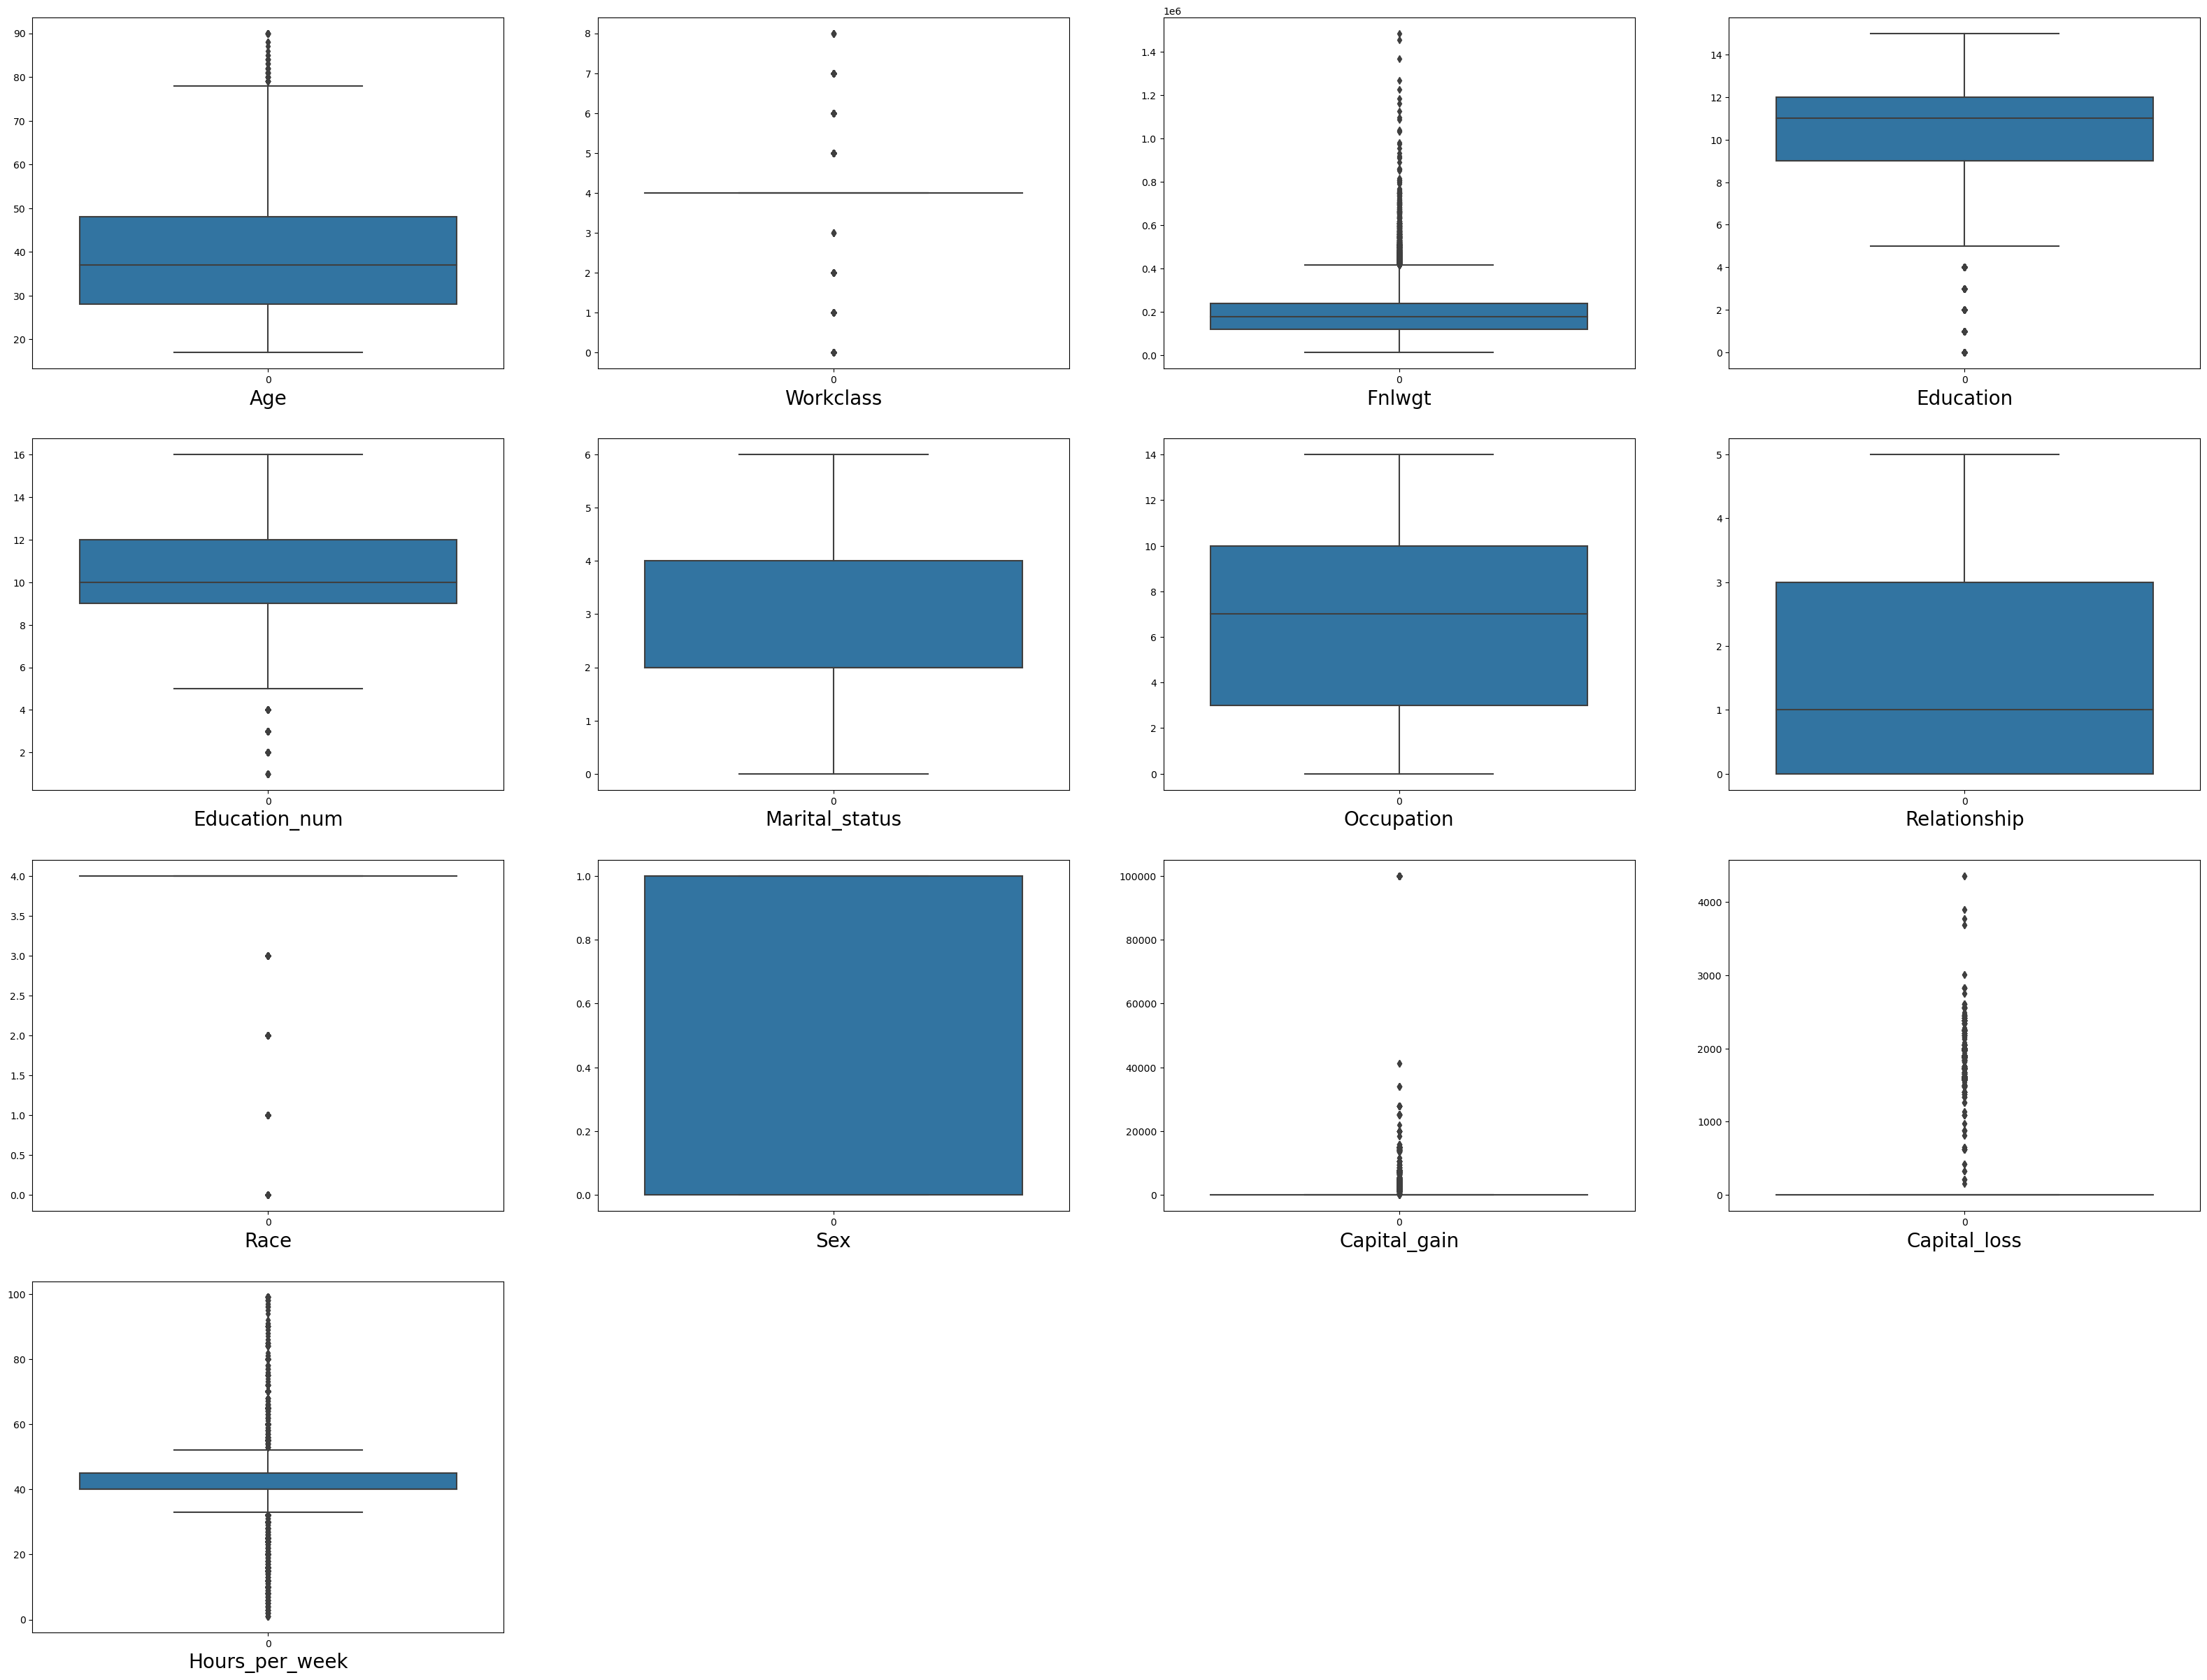

In [44]:
plt.figure(figsize=(40,30))
graph=1
for column in df:
    if graph<14:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout

Outliers are present in many columns

In [45]:
from scipy.stats import zscore
out_features=df[['Age','Workclass','Capital_gain','Capital_loss','Fnlwgt','Education','Race']]
z=np.abs(zscore(out_features))
z

,Age,Workclass,Capital_gain,Capital_loss,Fnlwgt,Education,Race
0,0.836961,1.463505,0.145969,0.216747,1.008703,0.335272,0.393692
1,0.042934,0.090200,0.145969,0.216747,0.245008,0.181506,0.393692
2,1.056935,0.090200,0.145969,0.216747,0.425720,2.402383,1.962450
3,0.776180,0.090200,0.145969,0.216747,1.408036,0.335272,1.962450
4,0.116259,0.090200,0.145969,0.216747,0.898091,0.439895,0.393692
...,...,...,...,...,...,...,...
32555,0.849505,0.090200,0.145969,0.216747,0.639647,0.852050,0.393692
32556,0.103715,0.090200,0.145969,0.216747,0.335469,0.181506,0.393692
32557,1.423558,0.090200,0.145969,0.216747,0.358812,0.181506,0.393692
32558,1.216128,0.090200,0.145969,0.216747,0.110897,0.181506,0.393692


In [46]:
#thresold=3
np.where(z>3)

(array([   10,    13,    14, ..., 32508, 32526, 32528], dtype=int64),
 array([6, 6, 6, ..., 6, 6, 6], dtype=int64))

In [47]:
df1=df[(z<3).all(axis=1)]
df1.shape

(29132, 15)

In [48]:
print("old df",df.shape)
print("new df",df1.shape)

old df (32536, 15)
new df (29132, 15)


In [49]:
print("Data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 10.46225719203344


In [50]:
df1.skew()

Age                0.485129
Workclass         -0.757181
Fnlwgt             0.623933
Education         -0.929269
Education_num     -0.308009
Marital_status    -0.038038
Occupation         0.122703
Relationship       0.759361
Race              -2.586079
Sex               -0.692556
Capital_gain       4.950500
Capital_loss      29.609578
Hours_per_week     0.227357
Native_country    -3.951973
Income             1.329174
dtype: float64

# plotting heat map

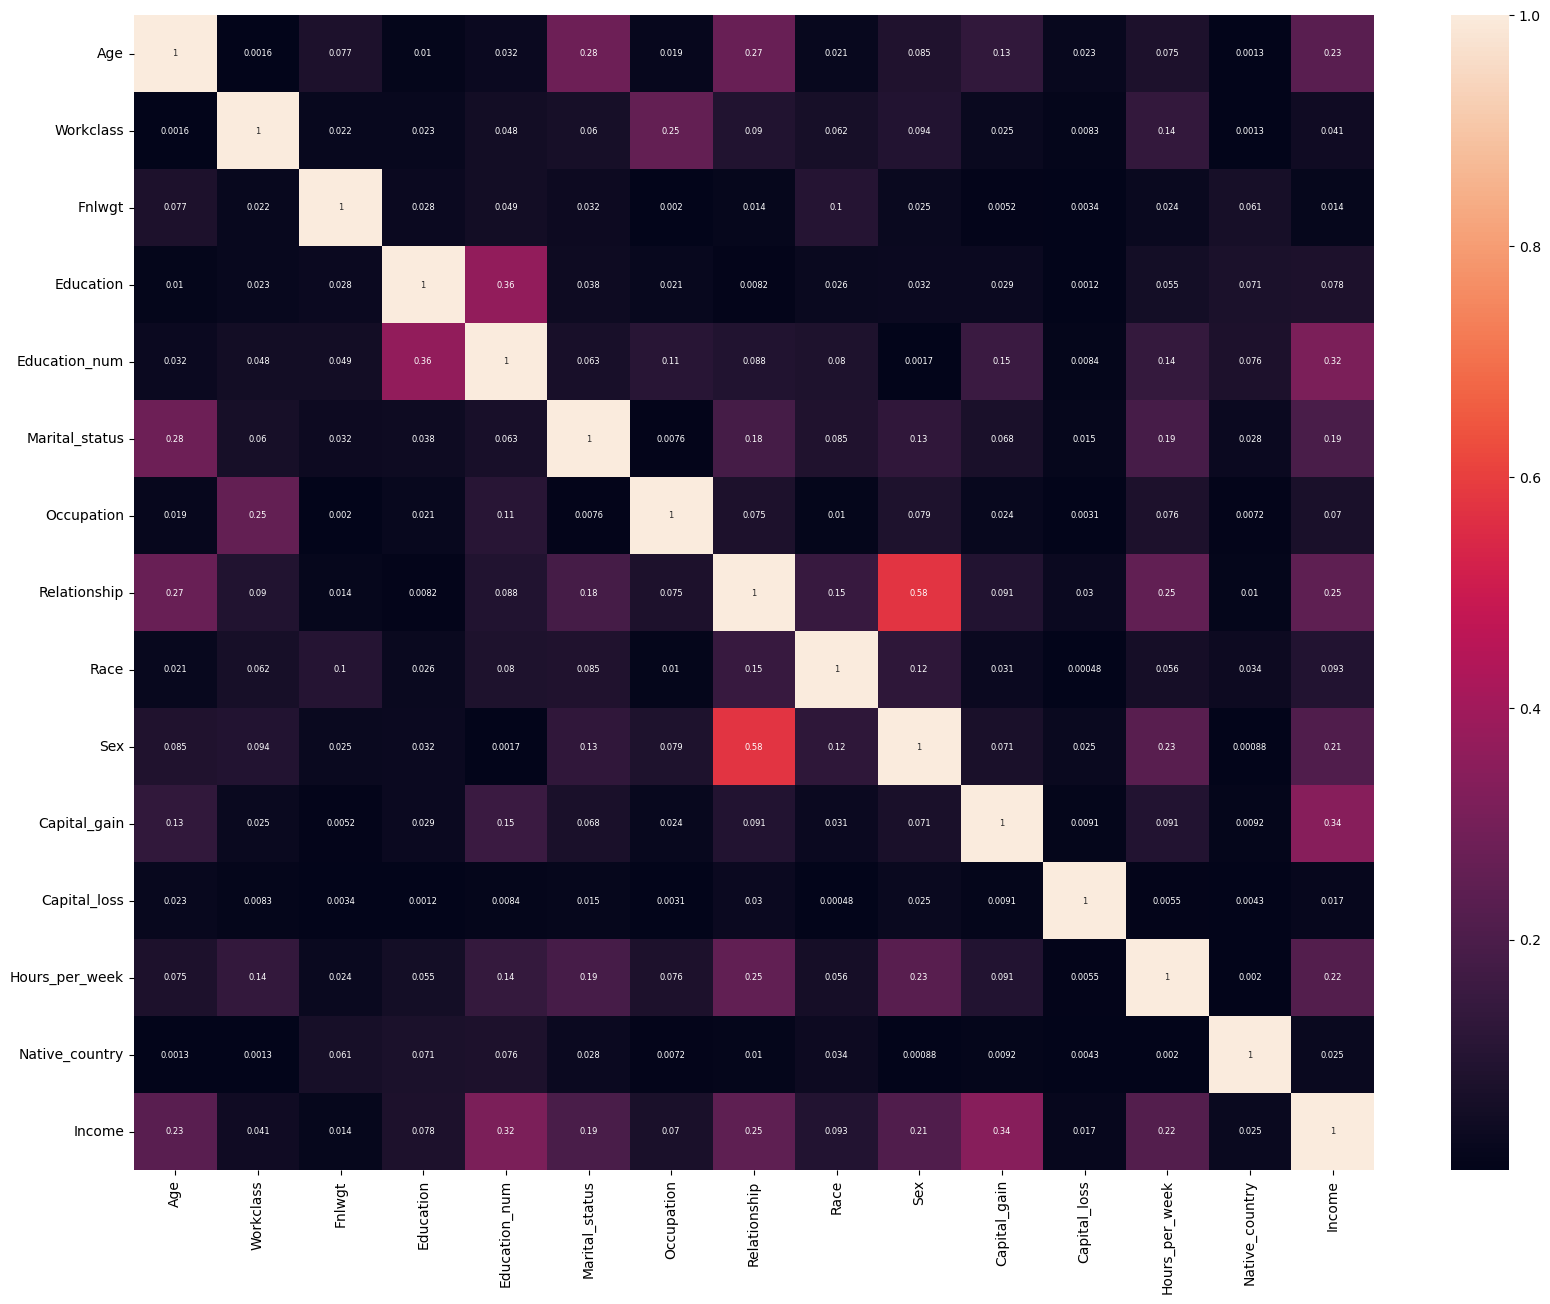

In [51]:
df1_corr=df1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df1_corr,annot=True,annot_kws={'size':6})
plt.show()

In [52]:
x= df1.drop('Income', axis=1)
y= df1['Income']

In [53]:
x.shape,y.shape

((29132, 14), (29132,))

# Feature scaling using standard scalarization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.869506,1.472411,-1.092363,-0.327395,1.184873,-0.406185,-0.603981,-0.912522,0.345672,0.711991,-0.244278,-0.037114,-2.225883,0.268900
1,-0.022359,0.092775,0.304279,0.184708,-0.397529,-1.724038,-0.131323,-0.289722,0.345672,0.711991,-0.244278,-0.037114,-0.024943,0.268900
2,1.092472,0.092775,0.505594,-2.375809,-1.188730,-0.406185,-0.131323,-0.912522,-2.963602,0.711991,-0.244278,-0.037114,-0.024943,0.268900
3,-0.765579,0.092775,1.599900,-0.327395,1.184873,-0.406185,0.813993,2.201478,-2.963602,-1.404512,-0.244278,-0.037114,-0.024943,-4.351414
4,-0.096681,0.092775,1.031819,0.440760,1.580473,-0.406185,-0.603981,2.201478,0.345672,-1.404512,-0.244278,-0.037114,-0.024943,0.268900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,-0.839901,0.092775,0.743910,-0.839499,0.789273,-0.406185,1.522980,2.201478,0.345672,-1.404512,-0.244278,-0.037114,-0.187975,0.268900
29128,0.126285,0.092775,-0.342376,0.184708,-0.397529,-0.406185,0.105006,-0.912522,0.345672,0.711991,-0.244278,-0.037114,-0.024943,0.268900
29129,1.464082,0.092775,-0.368380,0.184708,-0.397529,2.229519,-1.312967,1.578678,0.345672,-1.404512,-0.244278,-0.037114,-0.024943,0.268900
29130,-1.211512,0.092775,0.154879,0.184708,-0.397529,0.911667,-1.312967,0.955878,0.345672,0.711991,-0.244278,-0.037114,-1.655269,0.268900


In [55]:
x= x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

# Variance inflation factor

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,1.166317,Age
1,1.008826,Fnlwgt
2,1.056003,Education_num
3,1.127522,Marital_status
4,1.020204,Occupation
5,1.157949,Relationship
6,1.046925,Capital_gain
7,1.112547,Hours_per_week


# there is no multicolinearity By checking the vif values

# Finding the best RandomState

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.8542334096109839 at random state 1
Best accuracy is 0.8548054919908467 at random state 25
Best accuracy is 0.8573226544622425 at random state 45


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# classification Algorithms

In [59]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# Random Forest classification model

In [60]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8565217391304348
[[6391  465]
 [ 789 1095]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6856
           1       0.70      0.58      0.64      1884

    accuracy                           0.86      8740
   macro avg       0.80      0.76      0.77      8740
weighted avg       0.85      0.86      0.85      8740



# logisticRegression

In [61]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8367276887871854
[[6533  323]
 [1104  780]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6856
           1       0.71      0.41      0.52      1884

    accuracy                           0.84      8740
   macro avg       0.78      0.68      0.71      8740
weighted avg       0.82      0.84      0.82      8740



# SVC

In [62]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.859954233409611
[[6568  288]
 [ 936  948]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      6856
           1       0.77      0.50      0.61      1884

    accuracy                           0.86      8740
   macro avg       0.82      0.73      0.76      8740
weighted avg       0.85      0.86      0.85      8740



# AdaBoostClassifier

In [63]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada))
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

0.8668192219679633
[[6489  367]
 [ 797 1087]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6856
           1       0.75      0.58      0.65      1884

    accuracy                           0.87      8740
   macro avg       0.82      0.76      0.78      8740
weighted avg       0.86      0.87      0.86      8740



# Bagging Classifier

In [64]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.844050343249428
[[6368  488]
 [ 875 1009]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6856
           1       0.67      0.54      0.60      1884

    accuracy                           0.84      8740
   macro avg       0.78      0.73      0.75      8740
weighted avg       0.83      0.84      0.84      8740



# Decision Tree classifier

In [65]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8123569794050344
[[5996  860]
 [ 780 1104]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6856
           1       0.56      0.59      0.57      1884

    accuracy                           0.81      8740
   macro avg       0.72      0.73      0.73      8740
weighted avg       0.82      0.81      0.81      8740



# Cross validation

In [66]:
#cross validation of Random Forest
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.8491008775689434
Diff between acc_score and cross validation- 0.007420861561491465


In [67]:
score2=cross_val_score(LR,x,y)
print("score2")
print(score2.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score2.mean())

score2
0.8245916075072474
Diff between acc_score and cross validation- 0.012136081279938038


In [68]:
score3=cross_val_score(ada,x,y)
print("score3")
print(score3.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predada)-score3.mean())

score3
0.8575108911832536
Diff between acc_score and cross validation- 0.009308330784709717


In [69]:
score=cross_val_score(BC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predBC)-score.mean())

score
0.8403133524224712
Diff between acc_score and cross validation- 0.0037369908269567764


In [70]:
#cross validation for decision trees
score4=cross_val_score(DT,x,y)
print("score4")
print(score4.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predDT)-score4.mean())

score4
0.8056434671958979
Diff between acc_score and cross validation- 0.0067135122091365185


The difference between acc score and cross validation is less in Random Forest classifier.so,iam using RFR

# Hyper parameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
             'random_state':[10,50,1200],
             'max_depth':[10,15],
            'n_jobs':[-2,-1,1],
        
           'n_estimators':[50,100,200,300]}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1200]})

In [74]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [75]:
Final_model=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=50,n_jobs=-2,random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.83066361556064


Saving the model

In [76]:
import joblib
joblib.dump(Final_model,"Census income prediction.pkl")

['Census income prediction.pkl']

In [77]:
model=joblib.load("Census income prediction.pkl")
prediction=model.predict(x_test)

In [78]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
8735,0,0
8736,0,1
8737,0,0
8738,0,0
